In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = np.loadtxt("/content/drive/MyDrive/Yashar`s Code/fitinput.txt")

In [10]:
def yth(x, a, H):
  return a * x ** H

In [6]:
x = df[:, 0]
y = df[:, 1]
a = np.random.random()
H = np.random.random()

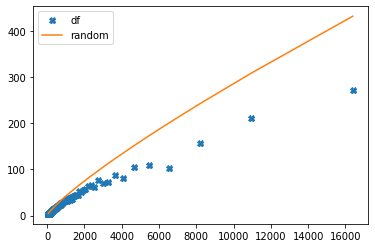

In [11]:
plt.plot(x, y, "X", Label= "df")
plt.plot(x, yth(x, a, H), Label="random")
plt.legend()
plt.show()

In [14]:
a_old = np.random.random()
H_old = np.random.random()
X2_old = 0

for i in range(len(x)):
  X2_old += (y[i] - yth(x[i], a_old, H_old))**2

In [17]:
n = 1000

for i in range(n):
  a_new = a_old + np.random.normal(scale=1)
  H_new = H_old + np.random.normal(scale=1)
  X2_new = 0
  for i in range(len(x)):
    X2_new = (y[i] - yth(x[i], a_new, H_new))**2
  
  dX2 = X2_new - X2_old
  AR = min([1, np.exp(- dX2 / 2)])

  r = np.random.random()
  if r <= AR:
        a_old = a_new
        H_old = H_new
        X2_old = X2_new

In [ ]:
plt.plot(x, y, "X", Label= "df")
plt.plot(x, yth(x, a_old, H_old), "-" , Label="Fitten Graph")
plt.title(f'a = {a_old:0.4}, H = {H_old:0.4}')
plt.legend()
plt.show()

In [20]:
def mcmc(df, n, return_path=True):
    
    x = df[:,0] ; y = df[:,1]
    a_path = [] ; H_path = []

    a_old = np.random.normal() 
    H_old = np.random.normal() 
    X2_old = 0
    for i in range(len(x)):
        X2_old += (y[i] - yth(x[i], a_old, H_old))**2

    for i in range(n):

        a_new = a_old + np.random.normal(scale=.1)
        H_new = H_old + np.random.normal(scale=.1)
        X2_new = 0
        for i in range(len(x)):
            X2_new += (y[i] - yth(x[i], a_new, H_new))**2
        
        d2 = X2_new - X2_old
        AR = min([1, np.exp(- d2/2)])
        r = np.random.random()
        if r <= AR:

            a_old = a_new
            H_old = H_new

            a_path.append(a_new)
            H_path.append(H_new)

            X2_old = X2_new
    
    if return_path==True:
        return a_path, H_path
    else:
        return a_old, H_old 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


(array([2., 0., 0., 0., 0., 0., 1., 2., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 1.]),
 array([0.77017026, 0.77046394, 0.77075762, 0.77105129, 0.77134497,
        0.77163865, 0.77193233, 0.77222601, 0.77251969, 0.77281337,
        0.77310705, 0.77340073, 0.77369441, 0.77398809, 0.77428177,
        0.77457545, 0.77486913, 0.77516281, 0.77545649, 0.77575017,
        0.77604385]),
 <a list of 20 Patch objects>)

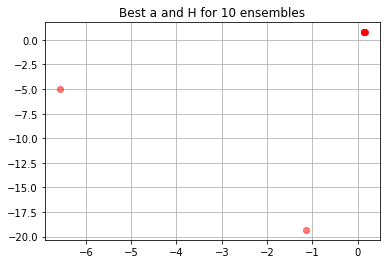

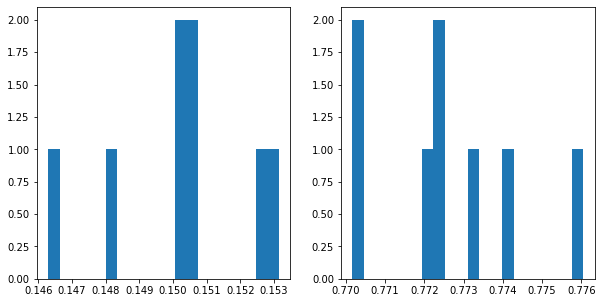

In [21]:
import os

n_ensebles = 10 # number of ensembles
os.mkdir('path')

for i in range(n_ensebles):
    path = mcmc(df, 10000, True)
    np.savetxt(f'path/{i}.txt', path)

plt.grid(True)
plt.title(f'Best a and H for {n_ensebles} ensembles')

for i in range(n_ensebles):
    path = np.loadtxt(f'path/{i}.txt')
    a_path, H_path = path
    plt.plot(a_path[-1], H_path[-1], 'ro', alpha=.5)

a_best_list = []
H_best_list = []
for i in range(n_ensebles):
    path = np.loadtxt(f'path/{i}.txt')
    a_path, H_path = path
    if len(a_path)<8000:
        a_best_list.append(a_path[-1])
        H_best_list.append(H_path[-1])

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(a_best_list, bins=20)
ax[1].hist(H_best_list, bins=20)